## Libraries used

In [309]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
%matplotlib inline
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

In [310]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [311]:
data=pd.read_csv("mbti_1.csv")
data.describe(include=object)

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [312]:
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


## Data cleaning

In [313]:
def cleaner(unclean_data):
    sentence=unclean_data.lower()
    sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    sentence=re.sub('[^0-9a-z]',' ',sentence)
    return sentence

In [314]:
data['posts']=data['posts'].apply(lambda x : cleaner(x))

## class expanding

In [315]:
processed_data = data.copy()
processed_data = processed_data.reindex(columns=["posts",'type','Extrovert','Sensitive','Thinking','Judging'])

In [316]:
for index,value in enumerate(processed_data['type']):
    if 'E' in value:
        processed_data.iloc[index,2]=1
    else:
        processed_data.iloc[index,2]=0
    if 'S' in value:
        processed_data.iloc[index,3]=1
    else:
        processed_data.iloc[index,3]=0
    if 'T' in value:
        processed_data.iloc[index,4]=1
    else:
        processed_data.iloc[index,4]=0
    if 'J' in value:
        processed_data.iloc[index,5]=1
    else:
        processed_data.iloc[index,5]=0

In [317]:
processed_data = processed_data.astype({"Extrovert": int,'Sensitive':int,'Thinking':int,'Judging':int}, errors='ignore')
processed_data.head()

,posts,type,Extrovert,Sensitive,Thinking,Judging
0,and intj moments sportscenter not top t...,INFJ,0,0,0,1
1,i m finding the lack of me in these posts ver...,ENTP,1,0,1,0
2,good one course to which i say i ...,INTP,0,0,1,0
3,dear intp i enjoyed our conversation the o...,INTJ,0,0,1,1
4,you re fired that s another silly misconce...,ENTJ,1,0,1,1


## Data visualization

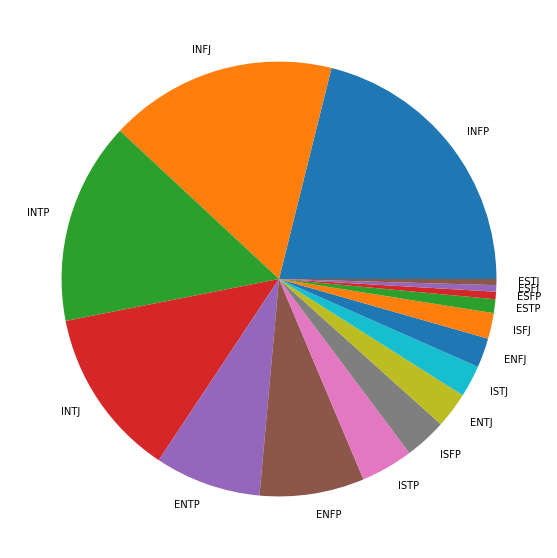

In [318]:
temp = dict(processed_data['type'].value_counts())
fig = plt.figure(figsize =(10, 10))
plt.pie(list(temp.values()),labels = list(temp.keys()))
plt.show()

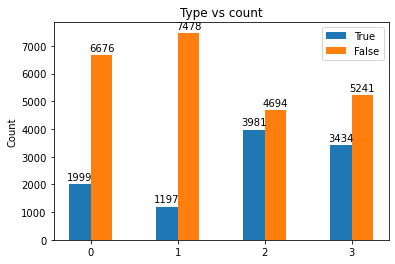

   ['Extrovert', 'Sesnitive', 'Thinking', 'Judging']


In [319]:
labels = ['Extrovert','Sesnitive','Thinking','Judging']
extro_list = list(processed_data['Extrovert'].value_counts())
sensi_list = list(processed_data['Sensitive'].value_counts())
think_list = list(processed_data['Thinking'].value_counts())
judge_list = list(processed_data['Judging'].value_counts())
false_values = [extro_list[0],sensi_list[0],think_list[0],judge_list[0]]
true_values = [extro_list[1],sensi_list[1],think_list[1],judge_list[1]]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, true_values, width, label='True')
rects2 = ax.bar(x + width/2, false_values, width, label='False')
ax.set_ylabel('Count')
ax.set_title('Type vs count')
ax.set_xticks(x)
ax.legend()
ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)


plt.show()
print("  ",labels)

## Feature seperation 

In [320]:
data_X = processed_data['posts']
data_Y = processed_data['type']
data_1 = processed_data['Extrovert']
data_2 = processed_data['Sensitive']
data_3 = processed_data['Thinking']
data_4 = processed_data['Judging']
# for multi-class classification
X_train,X_test,Y_train,Y_test = train_test_split(data_X,data_Y,test_size=.2,random_state=1)
# for binary classification 
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(data_X,data_1,test_size=.2,random_state=1)
X_train_2,X_test_2,Y_train_2,Y_test_2 = train_test_split(data_X,data_2,test_size=.2,random_state=1)
X_train_3,X_test_3,Y_train_3,Y_test_3 = train_test_split(data_X,data_3,test_size=.2,random_state=1)
X_train_4,X_test_4,Y_train_4,Y_test_4 = train_test_split(data_X,data_4,test_size=.2,random_state=1)

## Data preprocessing (NLP)

In [321]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

class Tokenizer(object):
    def __init__(self):
        self.tokenizer = TfidfVectorizer(max_features=1000,tokenizer=Lemmatizer(),stop_words='english')
    def tfidf(self,train,test):
        train = self.tokenizer.fit_transform(train).toarray()
        test = self.tokenizer.transform(test).toarray()
        return train,test

In [322]:
token = Tokenizer()
X_train,X_test = token.tfidf(X_train,X_test)
X_train_1,X_test_1 = token.tfidf(X_train_1,X_test_1)
X_train_2,X_test_2 = token.tfidf(X_train_2,X_test_2)
X_train_3,X_test_3 = token.tfidf(X_train_3,X_test_3)
X_train_4,X_test_4 = token.tfidf(X_train_4,X_test_4)

In [323]:
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.transform(Y_test)

## CART - Decision tree classifier with multiple class value

In [324]:
tree=DecisionTreeClassifier(max_depth=100,class_weight='balanced',max_features=1000,criterion='gini')
tree.fit(X_train,Y_train)
pred = tree.predict(X_test)
print(accuracy_score(pred,Y_test))
confusion_matrix(Y_test,pred)

0.4553314121037464


array([[ 20,   0,   2,   1,   0,   1,   0,   0,   5,   2,   1,   1,   0,
          1,   0,   0],
       [  2,  62,   0,   7,   0,   1,   0,   0,  16,  19,  12,  11,   1,
          6,   7,   3],
       [  0,   4,  13,   4,   0,   0,   0,   1,   8,   5,   8,   3,   2,
          1,   0,   0],
       [  2,   9,   4,  55,   1,   0,   0,   0,  20,  21,  12,  21,   1,
          1,   2,   5],
       [  0,   2,   0,   1,   0,   0,   0,   1,   1,   3,   2,   1,   0,
          0,   0,   0],
       [  0,   1,   0,   2,   0,   1,   0,   0,   1,   3,   1,   0,   0,
          1,   0,   1],
       [  0,   0,   1,   1,   0,   0,   2,   0,   0,   0,   1,   1,   0,
          0,   0,   0],
       [  1,   0,   0,   3,   0,   0,   1,   2,   1,   6,   1,   1,   0,
          0,   0,   0],
       [  8,  11,   0,  15,   0,   0,   0,   1, 150,  49,  14,  21,   4,
          1,   3,   3],
       [  6,  15,   7,  13,   1,   1,   1,   2,  54, 204,  21,  25,   7,
          8,   7,   3],
       [  1,  13,   7,   6,   

## SVM - Kernel SVC with multiple class value

In [325]:
model_svc=SVC(kernel='rbf',decision_function_shape='ovo',class_weight='balanced')
model_svc.fit(X_train,Y_train)
pred = classifier.predict(X_test)
print(accuracy_score(pred,Y_test))
confusion_matrix(Y_test,pred)

0.06974063400576369


array([[ 13,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 39, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 25,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 44, 110,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  7,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  5,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  3,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  6,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [256,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [350,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [198,  24,   0,   0,   

## SVM - Kernel SVC as binary classifier

In [326]:
classifier_1 = SVC(class_weight='balanced',kernel='rbf')
classifier_1.fit(X_train_1,Y_train_1)
pred_1 = classifier_1.predict(X_test_1)
print(accuracy_score(pred_1,Y_test_1))
confusion_matrix(Y_test_1,pred_1)

0.8553314121037464


array([[1198,  109],
       [ 142,  286]])

In [327]:
classifier_2 = SVC(class_weight='balanced',kernel='rbf')
classifier_2.fit(X_train_2,Y_train_2)
pred_2 = classifier_2.predict(X_test_2)
print(accuracy_score(pred_2,Y_test_2))
confusion_matrix(Y_test_2,pred_2)

0.9077809798270894


array([[1443,   66],
       [  94,  132]])

In [328]:
classifier_3 = SVC(class_weight='balanced',kernel='rbf')
classifier_3.fit(X_train_3,Y_train_3)
pred_3 = classifier_3.predict(X_test_3)
print(accuracy_score(pred_3,Y_test_3))
confusion_matrix(Y_test_3,pred_3)

0.8662824207492795


array([[821, 113],
       [119, 682]])

In [329]:
classifier_4 = SVC(class_weight='balanced',kernel='rbf')
classifier_4.fit(X_train_4,Y_train_4)
pred_4 = classifier_4.predict(X_test_4)
print(accuracy_score(pred_4,Y_test_4))
confusion_matrix(Y_test_4,pred_4)

0.7994236311239193


array([[895, 163],
       [185, 492]])

## CART - Decision tree as binary classifier

In [330]:
tree_1=DecisionTreeClassifier(max_depth=100,class_weight='balanced')
tree_1.fit(X_train_1,Y_train_1)
pred_1 = tree_1.predict(X_test_1)
print(accuracy_score(pred_1,Y_test_1))
confusion_matrix(Y_test_1,pred_1)

0.7780979827089337


array([[1124,  183],
       [ 202,  226]])

In [331]:
tree_2=DecisionTreeClassifier(max_depth=100,class_weight='balanced')
tree_2.fit(X_train_2,Y_train_2)
pred_2 = tree_2.predict(X_test_2)
print(accuracy_score(pred_2,Y_test_2))
confusion_matrix(Y_test_2,pred_2)

0.8443804034582133


array([[1364,  145],
       [ 125,  101]])

In [332]:
tree_3=DecisionTreeClassifier(max_depth=100,class_weight='balanced')
tree_3.fit(X_train_3,Y_train_3)
pred_3 = tree_3.predict(X_test_3)
print(accuracy_score(pred_3,Y_test_3))
confusion_matrix(Y_test_3,pred_3)

0.7256484149855907


array([[707, 227],
       [249, 552]])

In [333]:
tree_4=DecisionTreeClassifier(max_depth=100,class_weight='balanced')
tree_4.fit(X_train_4,Y_train_4)
pred_4 = tree_4.predict(X_test_4)
print(accuracy_score(pred_4,Y_test_4))
confusion_matrix(Y_test_4,pred_4)

0.7279538904899135


array([[837, 221],
       [251, 426]])